In [1]:
import tensorflow as tf
from tensorflow import keras
from keras.datasets import mnist

In [2]:
(x_train,y_train), (x_test, y_test) = mnist.load_data()

x_train.shape

(60000, 28, 28)

In [19]:
import numpy as np

np.min(y_train).round().astype(int), np.max(y_train).round().astype(int)

(np.int64(0), np.int64(9))

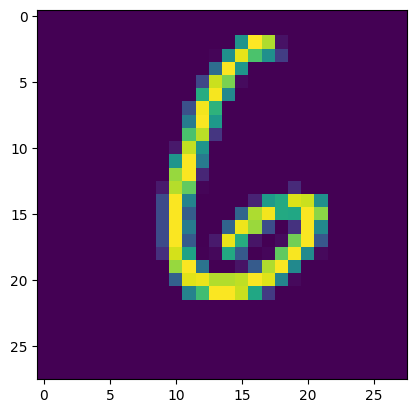

In [3]:
import matplotlib.pyplot as plt 
plt.imshow(x_train[32])

Preprocessing


In [6]:
x_train = x_train.reshape((-1, 28, 28, 1)).astype('float32')/255
x_test =x_test.reshape((-1,28,28,1)).astype('float32')/255

x_train.shape

(60000, 28, 28, 1)

Model definition

In [8]:
model = keras.Sequential()

model.add(keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28,1)))
model.add(keras.layers.MaxPool2D(2,2))

model.add(keras.layers.Conv2D(32, (3,3), activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(units=256, activation='relu'))
model.add(keras.layers.Dropout(.5))


model.add(keras.layers.Dense(units=10, activation='softmax'))


/Users/taktakro/Desktop/MLProjects/venv3.12/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
import tensorflow as tf

model.compile(optimizer= tf.optimizers.Adam(), loss= tf.losses.sparse_categorical_crossentropy, metrics=['accuracy'])

In [10]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 11, 11, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 800)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       205,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 217,194 (848.41 KB)

 Trainable params: 217,194 (848.41 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
hist = model.fit(x_train, y_train, epochs=10, batch_size= 256, validation_data=(x_test, y_test))

Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 0.1077 - loss: 2.3019 - val_accuracy: 0.1135 - val_loss: 2.3011
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.1122 - loss: 2.3016 - val_accuracy: 0.1135 - val_loss: 2.3010
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.1115 - loss: 2.3012 - val_accuracy: 0.1135 - val_loss: 2.3010
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - accuracy: 0.1149 - loss: 2.3009 - val_accuracy: 0.1135 - val_loss: 2.3010
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.1117 - loss: 2.3013 - val_accuracy: 0.1135 - val_loss: 2.3010
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.1117 - loss: 2.3013 - val_accuracy: 0.1135 - val_loss: 2.3011
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 0.1121 - loss: 2.3013 - val_accuracy: 0.1135 - val_loss: 2.3010
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - accuracy: 0.1115 - loss: 2.3014 - val_accu

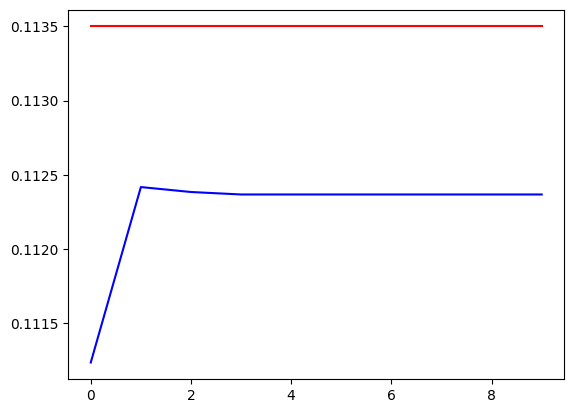

In [12]:
import matplotlib.pylab as plt

plt.plot(hist.history['accuracy'], color='blue')
plt.plot(hist.history['val_accuracy'], color='red')